<a href="https://colab.research.google.com/github/marcomedugno/marcomedugno/blob/main/House_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas
housing = pandas.read_csv('HW1_house_price_regression.csv')
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,

In [ ]:
# Check for NaNs
null = housing.isna().sum()
pandas.set_option('display.max_rows',null.shape[0]+1)
print(null)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Drop rows with missing data
housing.dropna(subset=['LotFrontage'],inplace=True)
housing.dropna(subset=['MasVnrArea'],inplace=True)
housing.dropna(subset=['Electrical'],inplace=True)
# create random values for GarageYrBuilt for houses with no Garage. 
# This will allow us to keep that variable without having NA's or removing any 
# houses that do not have garages.
housing['GarageYrBlt'].fillna((housing['GarageYrBlt'].mean()), inplace=True)
# Replace categorical NaNs with "None"
housing = housing.fillna("None")

In [ ]:
# Check to make sure that there are no more NaNs
null2 = housing.isna().sum()
pandas.set_option('display.max_rows',null2.shape[0]+1)
print(null2)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
Bedroom          0
Kitchen     

In [ ]:
# Create Dummy Variables
dm = pandas.get_dummies(housing)

In [ ]:
# Use feature selection by searching for highly correlated variables
cor = dm.corr()
#Correlation with output variable
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

OverallQual     0.801252
TotalBsmtSF     0.625737
1stFlrSF        0.618716
GrLivArea       0.704440
GarageCars      0.646639
GarageArea      0.630603
SalePrice       1.000000
ExterQual_TA    0.610133
Name: SalePrice, dtype: float64

In [ ]:
dm2 = dm.filter(['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea','ExterQual_TA','SalePrice'])
dm2

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,ExterQual_TA,SalePrice
0,7,856,856,1710,2,548,0,208500
1,6,1262,1262,1262,2,460,1,181500
2,7,920,920,1786,2,608,0,223500
3,7,756,961,1717,3,642,1,140000
4,8,1145,1145,2198,3,836,0,250000
...,...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,460,1,175000
1456,6,1542,2073,2073,2,500,1,210000
1457,7,1152,1188,2340,1,252,0,266500
1458,5,1078,1078,1078,1,240,1,142125


In [ ]:
#normalize data
from sklearn import preprocessing
preprocessing.normalize(dm2)

array([[3.35713306e-05, 4.10529415e-03, 4.10529415e-03, ...,
        2.62815560e-03, 0.00000000e+00, 9.99946063e-01],
       [3.30553480e-05, 6.95264153e-03, 6.95264153e-03, ...,
        2.53424335e-03, 5.50922466e-06, 9.99924276e-01],
       [3.13182641e-05, 4.11611470e-03, 4.11611470e-03, ...,
        2.72021493e-03, 0.00000000e+00, 9.99947431e-01],
       ...,
       [2.62648860e-05, 4.32244981e-03, 4.45752636e-03, ...,
        9.45535895e-04, 0.00000000e+00, 9.99941730e-01],
       [3.51772134e-05, 7.58420720e-03, 7.58420720e-03, ...,
        1.68850624e-03, 7.03544267e-06, 9.99912290e-01],
       [3.38945594e-05, 8.51431332e-03, 8.51431332e-03, ...,
        1.87097968e-03, 0.00000000e+00, 9.99889503e-01]])

In [ ]:
# Set target variable
X = dm2.drop("SalePrice",axis=1)   #Feature Matrix
Y = dm2["SalePrice"]
print(X)
print(Y)

      OverallQual  TotalBsmtSF  1stFlrSF  ...  GarageCars  GarageArea  ExterQual_TA
0               7          856       856  ...           2         548             0
1               6         1262      1262  ...           2         460             1
2               7          920       920  ...           2         608             0
3               7          756       961  ...           3         642             1
4               8         1145      1145  ...           3         836             0
...           ...          ...       ...  ...         ...         ...           ...
1455            6          953       953  ...           2         460             1
1456            6         1542      2073  ...           2         500             1
1457            7         1152      1188  ...           1         252             0
1458            5         1078      1078  ...           1         240             1
1459            5         1256      1256  ...           1         276       

In [ ]:
# split the data and target into training and validation sets
data_train, data_valid, target_train, target_valid = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
# create mlr model
mlr = LinearRegression()
# fit the training data
mlr.fit(data_train, target_train)

LinearRegression()

In [ ]:
print("Variables = %s" % data_train.columns.tolist())
print("Coefficients = %s" % mlr.coef_)
print("Intercept = %f" % mlr.intercept_)
print("R2 for training = %.5f" % mlr.score(data_train, target_train))
print("R2 for validation = %.5f" % mlr.score(data_valid, target_valid))

Variables = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'ExterQual_TA']
Coefficients = [ 2.17456125e+04  1.85760973e+01  1.41949921e+01  4.57712391e+01
  1.41522010e+04  1.18242381e+01 -1.77573227e+04]
Intercept = -77956.938383
R2 for training = 0.75321
R2 for validation = 0.79332


Since the R-Squared is higher on the validation data than the training data, I think this model does not need any more adjustments.


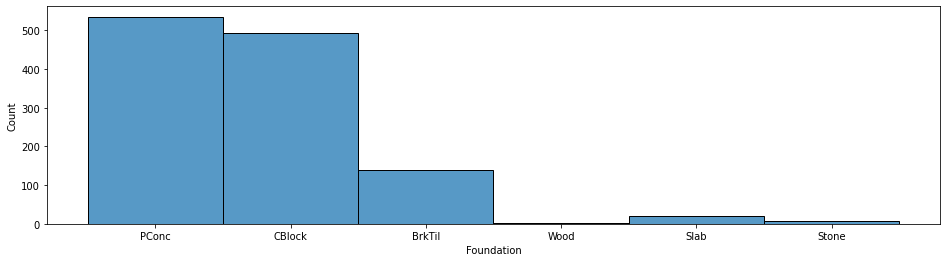

In [ ]:
# Histogram of Foundation
import seaborn as sn
plt.figure(figsize=(16,4))
sn.histplot(housing.Foundation)

From the Above Chart, we can see that Poured Concrete was the most common type of foundation among all homes, followed by Cinder Block. The least common type of foundation was Wood.